과제 3. 제약 만족 문제(CSP)


In [53]:
!pip install simpleai

과제 3-1. 'John', 'Anna', 'Tom', 'Patricia' 4명에 대해 도메인과 제약 조건이 정의되어 있다.

서로 다른 variable_heuristic과 value_heuristic을 조합하여 적용해서 성능 평가를 하시오.



---


1) variable_heuristic

최소 잔여 값 발견법(minimum-remaining-values) : MOST_CONSTRAINED_VARIABLE

차수 발견법(degree heuristic) : HIGHEST_DEGREE_VARIABLE



---



2) value_heuristic :

최소 제약 값(least-constraining-value) : LEAST_CONSTRAINING_VALUE


아래 코드는 수정 X(기존 simpleai 패키지는 평가 코드가 없어서 새로 추가)

In [54]:
import random
from copy import deepcopy, copy
from itertools import product
from simpleai.search.utils import argmin
from simpleai.search import CspProblem, \
        min_conflicts, MOST_CONSTRAINED_VARIABLE, \
        HIGHEST_DEGREE_VARIABLE, LEAST_CONSTRAINING_VALUE

from simpleai.search import csp

class Log:
  def __init__(self):
    self.log_list = []

  def delete(self):
    self.log_list = []

  def update(self, assignment):
    self.log_list.append(assignment)

  def print_log(self):
    print('print all step')

    for i, log in enumerate(self.log_list):
      print('{} step : '.format(i), end='')
      print(log)

  def print_cnt(self):
    print('total step : {}'.format(len(self.log_list)))

  def print(self):
    self.print_log()
    self.print_cnt()


def backtrack(problem, variable_heuristic='', value_heuristic='', inference=True, log=None):
    '''
    Backtracking search.
    variable_heuristic is the heuristic for variable choosing, can be
    MOST_CONSTRAINED_VARIABLE, HIGHEST_DEGREE_VARIABLE, or blank for simple
    ordered choosing.
    value_heuristic is the heuristic for value choosing, can be
    LEAST_CONSTRAINING_VALUE or blank for simple ordered choosing.
    '''
    assignment = {}
    domains = deepcopy(problem.domains)

    if variable_heuristic == csp.MOST_CONSTRAINED_VARIABLE:
        variable_chooser = csp._most_constrained_variable_chooser
    elif variable_heuristic == csp.HIGHEST_DEGREE_VARIABLE:
        variable_chooser = csp._highest_degree_variable_chooser
    else:
        variable_chooser = csp._basic_variable_chooser

    if value_heuristic == csp.LEAST_CONSTRAINING_VALUE:
        values_sorter = csp._least_constraining_values_sorter
    else:
        values_sorter = csp._basic_values_sorter
    return _backtracking(problem,
                         assignment,
                         domains,
                         variable_chooser,
                         values_sorter,
                         inference=inference,
                         log=log)
    
def _backtracking(problem, assignment, domains, variable_chooser, values_sorter, inference=True, log=None):
    '''
    Internal recursive backtracking algorithm.
    '''
    from simpleai.search.arc import arc_consistency_3

    if log is not None:
          log.update(assignment)
    
    if len(assignment) == len(problem.variables):
        return assignment

    pending = [v for v in problem.variables
               if v not in assignment]
    variable = variable_chooser(problem, pending, domains)

    values = values_sorter(problem, assignment, variable, domains)

    for value in values:
        new_assignment = deepcopy(assignment)
        new_assignment[variable] = value

        if not csp._count_conflicts(problem, new_assignment):  # TODO on aima also checks if using fc
            new_domains = deepcopy(domains)
            new_domains[variable] = [value]

            if not inference or arc_consistency_3(new_domains, problem.constraints):
                result = _backtracking(problem,
                                       new_assignment,
                                       new_domains,
                                       variable_chooser,
                                       values_sorter,
                                       inference=inference,
                                       log=log)
                if result:
                    return result

    return None


In [55]:
# Constraint that expects all the different variables 
# to have different values
def constraint_unique(variables, values):
    # Check if all the values are unique
    return len(values) == len(set(values))  

# Constraint that specifies that one variable 
# should be bigger than other
def constraint_bigger(variables, values):
    return values[0] > values[1]

# Constraint that specifies that there should be 
# one odd and one even variables in the two variables 
def constraint_odd_even(variables, values):
    # If first variable is even, then second should
    # be odd and vice versa
    if values[0] % 2 == 0:
        return values[1] % 2 == 1 
    else:
        return values[1] % 2 == 0

아래 코드부터 수정 O

In [56]:
if __name__=='__main__':
    variables = ('John', 'Anna', 'Tom', 'Patricia')

    domains = {
        'John': [1, 2, 3],
        'Anna': [1, 3],
        'Tom': [2, 4],
        'Patricia': [2, 3, 4],
    }

    constraints = [
        (('John', 'Anna', 'Tom'), constraint_unique),
        (('Tom', 'Anna'), constraint_bigger),
        (('John', 'Patricia'), constraint_odd_even),
    ]

    log = Log()
    problem = CspProblem(variables, domains, constraints)

    print('\nSolutions:\n\nNormal:', backtrack(problem, log=log))
    log.print()
    log.delete()

    # Most constrained variable 테스트 1
    print('Most constrained variable:',
          backtrack(problem, variable_heuristic=MOST_CONSTRAINED_VARIABLE,log=log))
    log.print()
    log.delete()

    # Highest degree variable 테스트 2
    print('Highest degree and least constraining value:', 
          backtrack(problem, variable_heuristic=HIGHEST_DEGREE_VARIABLE, 
                       value_heuristic=LEAST_CONSTRAINING_VALUE,log=log))
    log.print()
    log.delete()

    # Least constraining value 테스트 3
    print('Least constraining value:',
          backtrack(problem, value_heuristic=LEAST_CONSTRAINING_VALUE,log=log))
    log.print()
    log.delete()

    # Most constrained variable and least constraining value 테스트 4
    print('Most constrained variable and least constraining value:',
          backtrack(problem, variable_heuristic=MOST_CONSTRAINED_VARIABLE,
                    value_heuristic=LEAST_CONSTRAINING_VALUE,log=log))
    log.print()
    log.delete()

    # Highest degree and least constraining value 테스트 5
    print('Highest degree and least constraining value:',
          backtrack(problem, variable_heuristic=HIGHEST_DEGREE_VARIABLE,
                    value_heuristic=LEAST_CONSTRAINING_VALUE,log=log))
    log.print()
    log.delete()

    print('\nMinimum conflicts:', min_conflicts(problem))


Solutions:

Normal: {'John': 1, 'Anna': 3, 'Tom': 4, 'Patricia': 2}
print all step
0 step : {}
1 step : {'John': 1}
2 step : {'John': 1, 'Anna': 1}
3 step : {'John': 1, 'Anna': 3}
4 step : {'John': 1, 'Anna': 3, 'Tom': 4}
5 step : {'John': 1, 'Anna': 3, 'Tom': 4, 'Patricia': 2}
total step : 6
Most constrained variable: {'Anna': 1, 'Tom': 2, 'John': 3, 'Patricia': 2}
print all step
0 step : {}
1 step : {'Anna': 1}
2 step : {'Anna': 1, 'Tom': 2}
3 step : {'Anna': 1, 'Tom': 2, 'John': 3}
4 step : {'Anna': 1, 'Tom': 2, 'John': 3, 'Patricia': 2}
total step : 5
Highest degree and least constraining value: {'John': 1, 'Anna': 3, 'Tom': 4, 'Patricia': 2}
print all step
0 step : {}
1 step : {'John': 1}
2 step : {'John': 1, 'Anna': 1}
3 step : {'John': 1, 'Anna': 3}
4 step : {'John': 1, 'Anna': 3, 'Tom': 4}
5 step : {'John': 1, 'Anna': 3, 'Tom': 4, 'Patricia': 2}
total step : 6
Least constraining value: {'John': 1, 'Anna': 3, 'Tom': 4, 'Patricia': 2}
print all step
0 step : {}
1 step : {'John':

과제 3-2. 아래 3가지 지도 색칠하기 문제에서 domain과 constraint를 정의하고 실행 결과를 보이시오.



---


               
이때 이용할 general heuristic은 (MOST_CONSTRAINED_VARIABLE, LEAST_CONSTRAINING_VALUE)로 설정하시오.


1) 지도 색칠하기 1

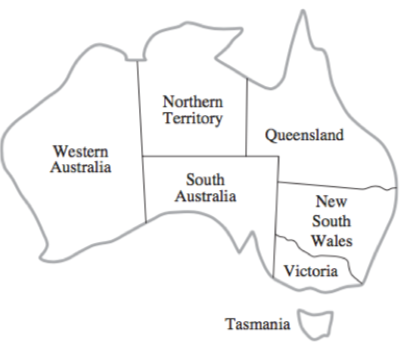

In [57]:
def constraint_not_same(variables, values):
    return values[0] != values[1]

In [58]:
if __name__=='__main__':
    variables = ('WA', 'NT', 'SA', 'Q', 'NSW', 'V', 'T')

    domains = {
        'WA': ['red', 'blue', 'green'],
        'NT': ['blue', 'green'],
        'SA': ['blue'],
        'Q': ['red'],
        'NSW': ['green'],
        'V': ['red'],
        'T': ['blue', 'green'],
    }

    constraints = [
        (('WA','NT'),constraint_not_same),
        (('WA','SA'),constraint_not_same),
        (('NT','SA'),constraint_not_same),
        (('Q','SA'),constraint_not_same),
        (('NSW','SA'),constraint_not_same),
        (('V','SA'),constraint_not_same),
        (('Q','NT'),constraint_not_same),
        (('Q','NSW'),constraint_not_same),
        (('V','NSW'),constraint_not_same),
        (('V','T'),constraint_not_same),
    ]

    log = Log()
    problem = CspProblem(variables, domains, constraints)
    
    print('\nMost constrained variable and least constraining value:\n', 
          backtrack(problem, variable_heuristic=MOST_CONSTRAINED_VARIABLE, 
          value_heuristic=LEAST_CONSTRAINING_VALUE, log=log))
    log.print()
    log.delete()


Most constrained variable and least constraining value:
 {'SA': 'blue', 'WA': 'red', 'NT': 'green', 'Q': 'red', 'NSW': 'green', 'V': 'red', 'T': 'blue'}
print all step
0 step : {}
1 step : {'SA': 'blue'}
2 step : {'SA': 'blue', 'WA': 'red'}
3 step : {'SA': 'blue', 'WA': 'red', 'NT': 'green'}
4 step : {'SA': 'blue', 'WA': 'red', 'NT': 'green', 'Q': 'red'}
5 step : {'SA': 'blue', 'WA': 'red', 'NT': 'green', 'Q': 'red', 'NSW': 'green'}
6 step : {'SA': 'blue', 'WA': 'red', 'NT': 'green', 'Q': 'red', 'NSW': 'green', 'V': 'red'}
7 step : {'SA': 'blue', 'WA': 'red', 'NT': 'green', 'Q': 'red', 'NSW': 'green', 'V': 'red', 'T': 'blue'}
total step : 8


2) 지도 색칠하기 2

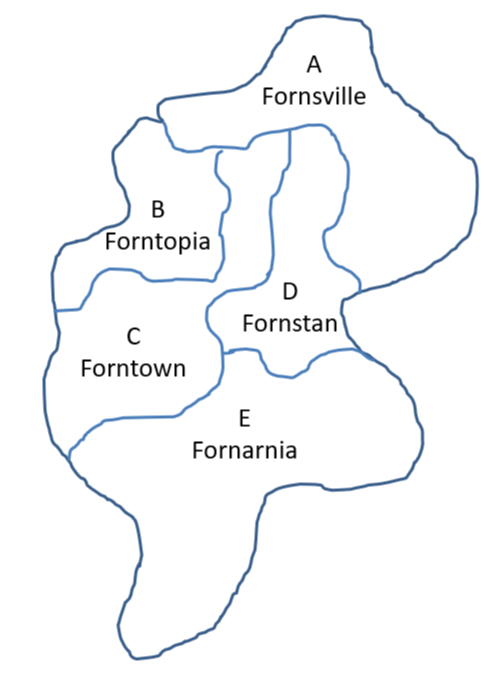

In [59]:
if __name__=='__main__':
    variables = ('A', 'B', 'C', 'D', 'E')

    domains = {
        'A': ['red', 'blue', 'green'],
        'B': ['blue', 'green'],
        'C': ['green'],
        'D': ['blue'],
        'E': ['red', 'blue'],
    }

    constraints = [
    (('A','B'),constraint_not_same),
    (('A','C'),constraint_not_same),
    (('A','D'),constraint_not_same),
    (('C','B'),constraint_not_same),
    (('C','D'),constraint_not_same),
    (('D','E'),constraint_not_same),
    ]

    log = Log()
    problem = CspProblem(variables, domains, constraints)
    
    print('\nMost constrained variable and least constraining value:\n', 
          backtrack(problem, variable_heuristic=MOST_CONSTRAINED_VARIABLE, 
          value_heuristic=LEAST_CONSTRAINING_VALUE, log=log))
    log.print()
    log.delete()


Most constrained variable and least constraining value:
 {'C': 'green', 'A': 'red', 'B': 'blue', 'D': 'blue', 'E': 'red'}
print all step
0 step : {}
1 step : {'C': 'green'}
2 step : {'C': 'green', 'A': 'red'}
3 step : {'C': 'green', 'A': 'red', 'B': 'blue'}
4 step : {'C': 'green', 'A': 'red', 'B': 'blue', 'D': 'blue'}
5 step : {'C': 'green', 'A': 'red', 'B': 'blue', 'D': 'blue', 'E': 'red'}
total step : 6


3) 지도 색칠하기 3



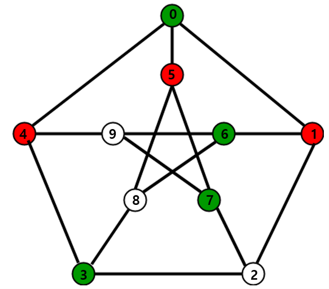

In [60]:
if __name__=='__main__':
    variables = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')

    domains = {
        '0': ['red', 'blue', 'green'],
        '1': ['red', 'blue'],
        '2': ['blue', 'green'],
        '3': ['red', 'green'],
        '4': ['red', 'blue'],
        '5': ['red', 'blue'],
        '6': ['blue', 'green'],
        '7': ['green'],
        '8': ['blue'],
        '9': ['blue'],
    }

    constraints = [
         (('0','5'),constraint_not_same),
         (('0','4'),constraint_not_same),
         (('0','1'),constraint_not_same),
         (('6','1'),constraint_not_same),
         (('2','1'),constraint_not_same),
         (('2','7'),constraint_not_same),
         (('2','3'),constraint_not_same),
         (('8','3'),constraint_not_same),
         (('4','3'),constraint_not_same),
         (('4','9'),constraint_not_same),
         (('8','5'),constraint_not_same),
         (('7','5'),constraint_not_same),
         (('6','8'),constraint_not_same),
         (('6','9'),constraint_not_same),
         (('7','9'),constraint_not_same),
    ]

    log = Log()
    problem = CspProblem(variables, domains, constraints)
    
    print('\nMost constrained variable and least constraining value:\n', 
          backtrack(problem, variable_heuristic=MOST_CONSTRAINED_VARIABLE, 
          value_heuristic=LEAST_CONSTRAINING_VALUE, log=log))
    log.print()
    log.delete()




Most constrained variable and least constraining value:
 {'7': 'green', '1': 'red', '2': 'blue', '3': 'green', '4': 'red', '5': 'red', '6': 'green', '8': 'blue', '9': 'blue', '0': 'blue'}
print all step
0 step : {}
1 step : {'7': 'green'}
2 step : {'7': 'green', '1': 'red'}
3 step : {'7': 'green', '1': 'red', '2': 'blue'}
4 step : {'7': 'green', '1': 'red', '2': 'blue', '3': 'green'}
5 step : {'7': 'green', '1': 'red', '2': 'blue', '3': 'green', '4': 'red'}
6 step : {'7': 'green', '1': 'red', '2': 'blue', '3': 'green', '4': 'red', '5': 'red'}
7 step : {'7': 'green', '1': 'red', '2': 'blue', '3': 'green', '4': 'red', '5': 'red', '6': 'green'}
8 step : {'7': 'green', '1': 'red', '2': 'blue', '3': 'green', '4': 'red', '5': 'red', '6': 'green', '8': 'blue'}
9 step : {'7': 'green', '1': 'red', '2': 'blue', '3': 'green', '4': 'red', '5': 'red', '6': 'green', '8': 'blue', '9': 'blue'}
10 step : {'7': 'green', '1': 'red', '2': 'blue', '3': 'green', '4': 'red', '5': 'red', '6': 'green', '8': '